<a href="https://colab.research.google.com/github/Tlmgeorge/first-repo/blob/main/Computational_Drug_Discovery_2_Ebola_virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages


In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-03-13 07:02:34--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   168MB/s    in 0.5s    

2025-03-13 07:02:35 (168 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.

# Loading Preprocessed Bioactivity Data

In [2]:
import pandas as pd
df = pd.read_csv("ebola_bioactivity_preprocessed_data.csv")
df

,ebola_mol_cid,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL480,CCN(CC)CCNc1cc(C)nc2c1ccc1c2ccc2c(NCCN(CC)CC)c...,active,5000.0
1,CHEMBL178459,Cc1cc(NCCCN2CCCCC2)c2ccc3c(ccc4c(NCCCN5CCCCC5)...,active,5000.0
2,CHEMBL3545157,Cc1cc(NCCCN2CCOCC2)c2ccc3c(ccc4c(NCCCN5CCOCC5)...,active,2500.0
3,CHEMBL297453,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(c2ccc...,intermediate,10000.0
4,CHEMBL4303595,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(=O)c2...,active,3000.0
...,...,...,...,...
260,CHEMBL5196922,CCCCN(CCCC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O,active,720.0
261,CHEMBL5180554,CCCCCCCCN(C)Cc1cc(Nc2ccnc3cc(I)ccc23)ccc1O,active,260.0
262,CHEMBL3427166,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(Cc2cccc...,active,1600.0
263,CHEMBL218394,COC(=O)c1ccc(COc2ccccc2CN2CCN(C(=O)CNC(=O)CC34...,intermediate,130.0


# Importing Libraries

In [6]:
import numpy as np
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Calculating Descriptors

In [24]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors


In [25]:
df_lipsinki = lipinski(df.canonical_smiles)
df_lipsinki

,MW,LogP,NumHDonors,NumHAcceptors
0,523.169,6.48224,2.0,6.0
1,575.245,7.55064,2.0,6.0
2,579.189,5.24324,2.0,8.0
3,485.672,4.64290,1.0,3.0
4,423.557,2.69370,1.0,3.0
...,...,...,...,...
260,411.977,6.73960,2.0,4.0
261,517.455,7.08090,2.0,4.0
262,409.574,3.05350,1.0,3.0
263,573.734,4.41910,1.0,6.0


# Combining both DataFrames into one

In [26]:
df_combined = pd.concat([df, df_lipsinki], axis=1)
df_combined

,ebola_mol_cid,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,CCN(CC)CCNc1cc(C)nc2c1ccc1c2ccc2c(NCCN(CC)CC)c...,active,5000.0,523.169,6.48224,2.0,6.0
1,CHEMBL178459,Cc1cc(NCCCN2CCCCC2)c2ccc3c(ccc4c(NCCCN5CCCCC5)...,active,5000.0,575.245,7.55064,2.0,6.0
2,CHEMBL3545157,Cc1cc(NCCCN2CCOCC2)c2ccc3c(ccc4c(NCCCN5CCOCC5)...,active,2500.0,579.189,5.24324,2.0,8.0
3,CHEMBL297453,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(c2ccc...,intermediate,10000.0,485.672,4.64290,1.0,3.0
4,CHEMBL4303595,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(=O)c2...,active,3000.0,423.557,2.69370,1.0,3.0
...,...,...,...,...,...,...,...,...
260,CHEMBL5196922,CCCCN(CCCC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O,active,720.0,411.977,6.73960,2.0,4.0
261,CHEMBL5180554,CCCCCCCCN(C)Cc1cc(Nc2ccnc3cc(I)ccc23)ccc1O,active,260.0,517.455,7.08090,2.0,4.0
262,CHEMBL3427166,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(Cc2cccc...,active,1600.0,409.574,3.05350,1.0,3.0
263,CHEMBL218394,COC(=O)c1ccc(COc2ccccc2CN2CCN(C(=O)CNC(=O)CC34...,intermediate,130.0,573.734,4.41910,1.0,6.0


# Converting IC50 to pIC5O
This is to allow uniform distribution of IC50 data

In [34]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x


In [35]:
df_combined.standard_value.describe()

,standard_value
count,265.000000
mean,12370.096604
std,42460.409741
min,0.040000
25%,300.000000
50%,1800.000000
75%,8000.000000
max,620000.000000


In [20]:
-np.log10( (10**-9)* 100000000 )

1.0

In [21]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [36]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [37]:
df_norm = norm_value(df_combined)
df_norm

,ebola_mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,CCN(CC)CCNc1cc(C)nc2c1ccc1c2ccc2c(NCCN(CC)CC)c...,active,523.169,6.48224,2.0,6.0,5000.0
1,CHEMBL178459,Cc1cc(NCCCN2CCCCC2)c2ccc3c(ccc4c(NCCCN5CCCCC5)...,active,575.245,7.55064,2.0,6.0,5000.0
2,CHEMBL3545157,Cc1cc(NCCCN2CCOCC2)c2ccc3c(ccc4c(NCCCN5CCOCC5)...,active,579.189,5.24324,2.0,8.0,2500.0
3,CHEMBL297453,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(c2ccc...,intermediate,485.672,4.64290,1.0,3.0,10000.0
4,CHEMBL4303595,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(=O)c2...,active,423.557,2.69370,1.0,3.0,3000.0
...,...,...,...,...,...,...,...,...
260,CHEMBL5196922,CCCCN(CCCC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O,active,411.977,6.73960,2.0,4.0,720.0
261,CHEMBL5180554,CCCCCCCCN(C)Cc1cc(Nc2ccnc3cc(I)ccc23)ccc1O,active,517.455,7.08090,2.0,4.0,260.0
262,CHEMBL3427166,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(Cc2cccc...,active,409.574,3.05350,1.0,3.0,1600.0
263,CHEMBL218394,COC(=O)c1ccc(COc2ccccc2CN2CCN(C(=O)CNC(=O)CC34...,intermediate,573.734,4.41910,1.0,6.0,130.0


In [39]:
df_final = pIC50(df_norm)
df_final

,ebola_mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,CCN(CC)CCNc1cc(C)nc2c1ccc1c2ccc2c(NCCN(CC)CC)c...,active,523.169,6.48224,2.0,6.0,5.301030
1,CHEMBL178459,Cc1cc(NCCCN2CCCCC2)c2ccc3c(ccc4c(NCCCN5CCCCC5)...,active,575.245,7.55064,2.0,6.0,5.301030
2,CHEMBL3545157,Cc1cc(NCCCN2CCOCC2)c2ccc3c(ccc4c(NCCCN5CCOCC5)...,active,579.189,5.24324,2.0,8.0,5.602060
3,CHEMBL297453,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(c2ccc...,intermediate,485.672,4.64290,1.0,3.0,5.000000
4,CHEMBL4303595,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(=O)c2...,active,423.557,2.69370,1.0,3.0,5.522879
...,...,...,...,...,...,...,...,...
260,CHEMBL5196922,CCCCN(CCCC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O,active,411.977,6.73960,2.0,4.0,6.142668
261,CHEMBL5180554,CCCCCCCCN(C)Cc1cc(Nc2ccnc3cc(I)ccc23)ccc1O,active,517.455,7.08090,2.0,4.0,6.585027
262,CHEMBL3427166,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(Cc2cccc...,active,409.574,3.05350,1.0,3.0,5.795880
263,CHEMBL218394,COC(=O)c1ccc(COc2ccccc2CN2CCN(C(=O)CNC(=O)CC34...,intermediate,573.734,4.41910,1.0,6.0,6.886057


# Removing the Intermediate class
The intermediate class willl be removed to only remain "Active" and "Inactive"

In [41]:
df_2class = df_final[df_final.bioactivity_class != "intermediate"]
df_2class

,ebola_mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,CCN(CC)CCNc1cc(C)nc2c1ccc1c2ccc2c(NCCN(CC)CC)c...,active,523.169,6.48224,2.0,6.0,5.301030
1,CHEMBL178459,Cc1cc(NCCCN2CCCCC2)c2ccc3c(ccc4c(NCCCN5CCCCC5)...,active,575.245,7.55064,2.0,6.0,5.301030
2,CHEMBL3545157,Cc1cc(NCCCN2CCOCC2)c2ccc3c(ccc4c(NCCCN5CCOCC5)...,active,579.189,5.24324,2.0,8.0,5.602060
4,CHEMBL4303595,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(C(=O)c2...,active,423.557,2.69370,1.0,3.0,5.522879
6,CHEMBL55400,COC(=O)c1ccc(COc2ccccc2CN2CCN(C(=O)CNC(=O)CC34...,active,573.734,4.41910,1.0,6.0,7.698970
...,...,...,...,...,...,...,...,...
257,CHEMBL92708,CCN(CC)Cc1cc(Nc2ccnc3cc(I)ccc23)ccc1O,inactive,447.320,5.13040,2.0,4.0,6.193820
260,CHEMBL5196922,CCCCN(CCCC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O,active,411.977,6.73960,2.0,4.0,6.142668
261,CHEMBL5180554,CCCCCCCCN(C)Cc1cc(Nc2ccnc3cc(I)ccc23)ccc1O,active,517.455,7.08090,2.0,4.0,6.585027
262,CHEMBL3427166,O=C(CC12CC3CC(CC(C3)C1)C2)NCC(=O)N1CCN(Cc2cccc...,active,409.574,3.05350,1.0,3.0,5.795880


# Chemical Space Analysis (EDA)

## Importing Libraries

In [42]:
import seaborn as sns
sns.set(style= "ticks")
import matplotlib.pyplot as plt

## Frequency Plot of the Two(2) Bioactivity Classes

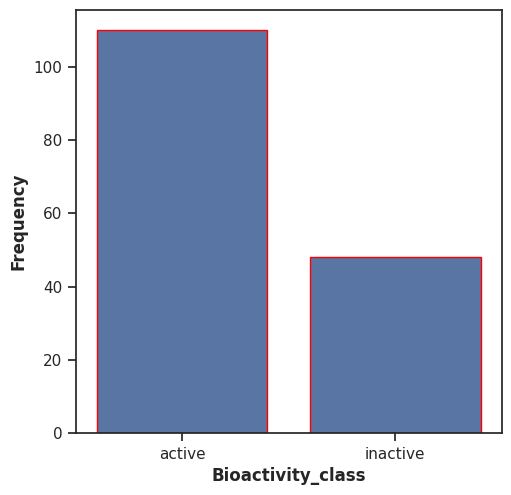

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x="bioactivity_class", data=df_2class, edgecolor="red")

plt.xlabel("Bioactivity_class", fontsize=12, fontweight="bold")

plt.ylabel("Frequency", fontsize=12, fontweight="bold")

plt.savefig("plot_bioactivity_class.pdf")



## Scatter Plot of MW versus LogP

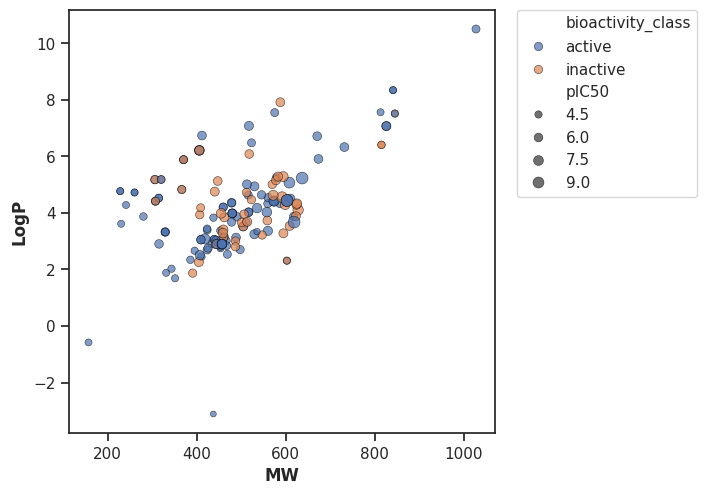

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x="MW", y="LogP", data=df_2class, hue="bioactivity_class", size="pIC50", edgecolor="black", alpha = 0.7)

plt.xlabel("MW", fontsize=12, fontweight="bold")

plt.ylabel("LogP", fontsize=12, fontweight="bold")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig("plot_MW_vs_LogP.pdf")


## BoxPlot of pIC50 value

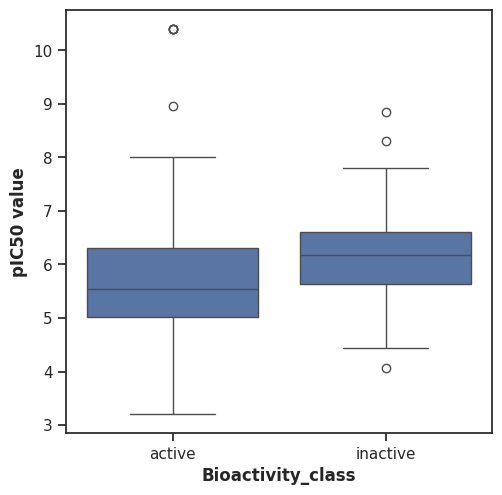

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x="bioactivity_class", y="pIC50", data=df_2class)

plt.xlabel("Bioactivity_class", fontsize=12, fontweight="bold")

plt.ylabel("pIC50 value", fontsize=12, fontweight="bold")

plt.savefig("plot_pIC50.pdf")

## Statistical Analysis | Mann-Whitney U Test

In [56]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [57]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1912.5,0.005976,0.05,Different distribution (reject H0)


## BoxPlot for Molecular Weight

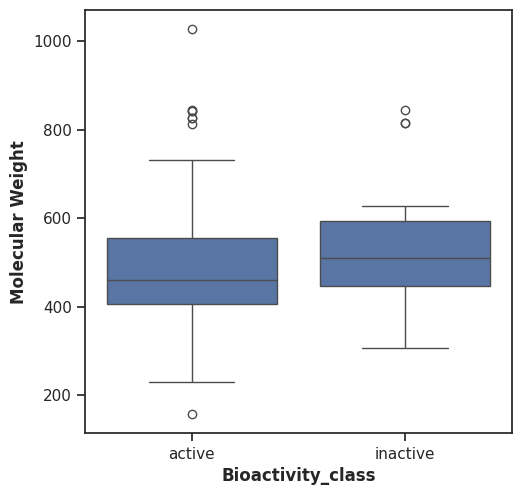

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x="bioactivity_class", y="MW", data=df_2class)

plt.xlabel("Bioactivity_class", fontsize=12, fontweight="bold")

plt.ylabel("Molecular Weight", fontsize=12, fontweight="bold")

plt.savefig("plot_Molecular_Weight.pdf")

In [60]:
mannwhitney("MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2079.5,0.034235,0.05,Different distribution (reject H0)


## BoxPlot for LogP

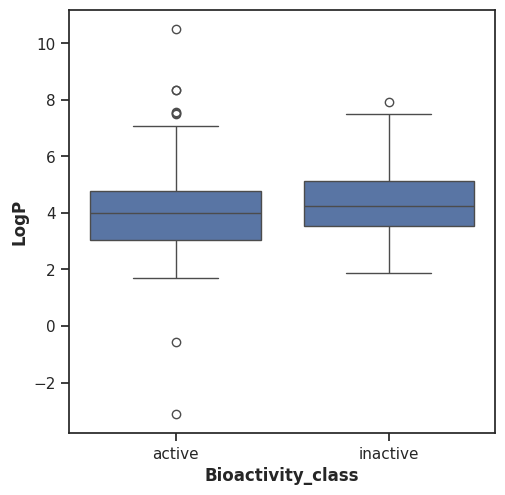

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x="bioactivity_class", y="LogP", data=df_2class)

plt.xlabel("Bioactivity_class", fontsize=12, fontweight="bold")

plt.ylabel("LogP", fontsize=12, fontweight="bold")

plt.savefig("plot_LogP.pdf")

In [61]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2336.0,0.251165,0.05,Same distribution (fail to reject H0)


## BoxPlot for NumHDonors

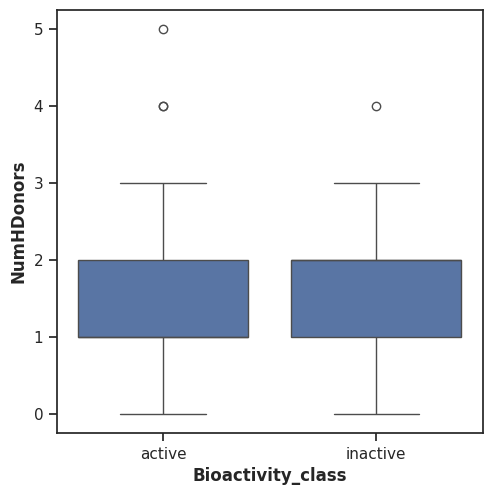

In [62]:
 plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x="bioactivity_class", y="NumHDonors", data=df_2class)

plt.xlabel("Bioactivity_class", fontsize=12, fontweight="bold")

plt.ylabel("NumHDonors", fontsize=12, fontweight="bold")

plt.savefig("plot_NumHDonors.pdf")

In [63]:
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2345.5,0.233615,0.05,Same distribution (fail to reject H0)


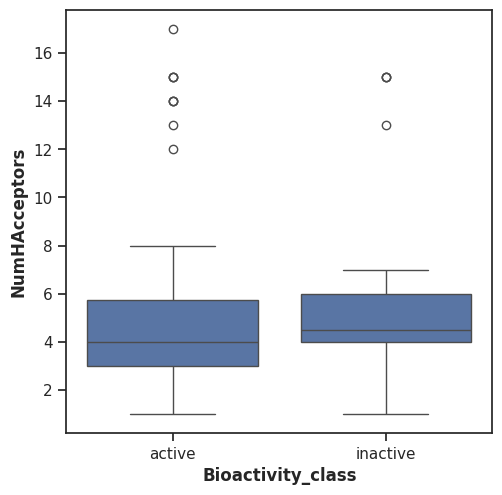

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x="bioactivity_class", y="NumHAcceptors", data=df_2class)

plt.xlabel("Bioactivity_class", fontsize=12, fontweight="bold")

plt.ylabel("NumHAcceptors", fontsize=12, fontweight="bold")

plt.savefig("plot_NumHAcceptors.pdf")

In [65]:
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2183.0,0.078049,0.05,Same distribution (fail to reject H0)


# Interpretation of Results
**pIC50**

Using the pIC50 values, actives and inactives showed slight statistical difference.

**Lipinski Descriptors**

Of the four Lipinski descriptors, only ***Molecular weight ***showed statistically significant dofference between ***actives*** and ***inactives*** while the others showed little to no statistically significant differences.

In [67]:
 ! zip -r results.zip  .  -i  *.csv *.pdf

  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 13%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_pIC50.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_Molecular_Weight.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: ebola_bioactivity_preprocessed_data.csv (deflated 84%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
